# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display   # Allows the use of display() for DataFrames
from IPython.display import Image
import matplotlib.pyplot as plt 

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 153, 311]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.iloc[indices], columns = data.keys())
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,16117,46197,92780,1026,40827,2944
153,3463,9250,2368,779,302,1627
311,29635,2335,8280,3046,371,117


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- (85) With high numbers (see below) across all categories (except Frozen) this establishment looks like a market or a retailer/reseller. 
    - Fresh - 16117 vs 12000 (mean)
    - Milk - 46197 vs 5796 (mean)
    - Grocery - 92780 vs 7951 (mean)
    - Detergents_Paper - 40827 vs 2881 (mean)

- (153) With high "Milk" (9250 vs mean of 5797) and upto average "Delicatessen" (1627 vs mean of 1525) this seems like a cafe. 

- (311) With a high "Fresh" (29635 vs mean of 12000) and average "Grocery" (8280 vs mean of 7951) this seems like a hotel/cafe. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

for drop_feature in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(drop_feature, axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[drop_feature], 
                                                        test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("Predicting {0} leads to R^2 score of {1}".format(drop_feature, score))

Predicting Fresh leads to R^2 score of -0.385749710204
Predicting Milk leads to R^2 score of 0.156275395017
Predicting Grocery leads to R^2 score of 0.681884008544
Predicting Frozen leads to R^2 score of -0.210135890125
Predicting Detergents_Paper leads to R^2 score of 0.271666980627
Predicting Delicatessen leads to R^2 score of -2.2547115372


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Predicting "Grocery" gives the highest $R^2$ value of $0.682$. This feature seems redundant since it can be predicted reasonably well using the other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

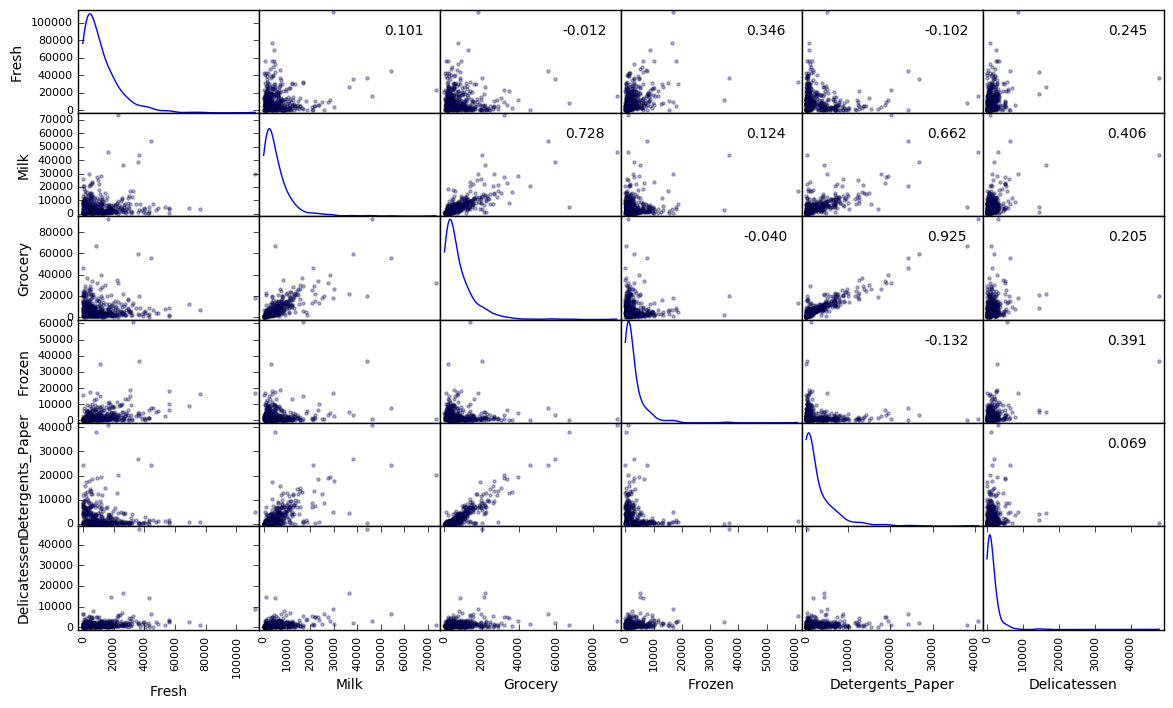

In [6]:
# Produce a scatter matrix for each pair of features in the data
# correlation annotation code obtained from 
# http://stackoverflow.com/questions/27768677/pandas-scatter-matrix-display-correlation-coefficient
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
corr = data.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

- "Grocery" looks correlated (0.728) to "Milk" and strongly correlated (0.925) to "Detergents_Paper". This confirms the hypothesis that "Grocery" feature can be removed due to redundancy. Surpisingly, the $R^2$ value of the predictor for "Detergents_Paper" was relatively lower that that for "Grocery". I'll be keeping Grocery in the data with the assumption that PCA will take care of the redundancy. 

- Data distribution: Each feature is skewed in its distribution with highest frequencies in the low values and a long tail with some outliers with high values. Clearly the data is not normally distributed leading to possible future problems during clustering. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

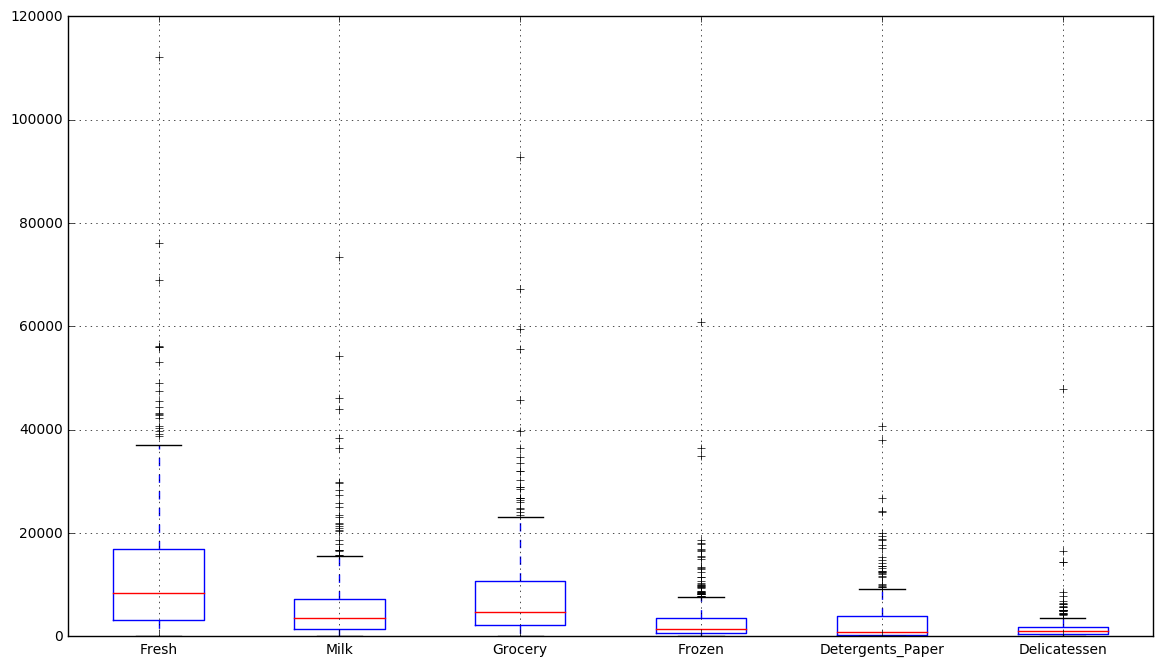

In [7]:
a = plt.figure(figsize=(14, 8))
a = data.boxplot(return_type="axes")

The boxplot above shows that almost all features have many outlier values. 

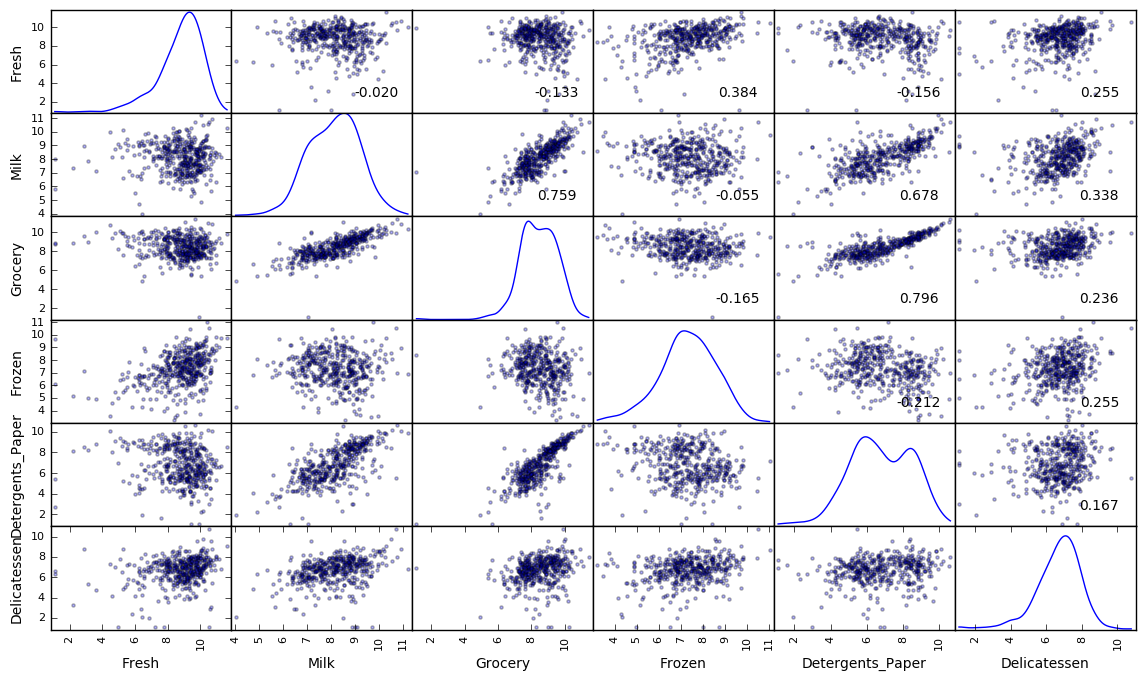

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
corr = log_data.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
153,8.149891,9.132379,7.769801,6.658011,5.710427,7.394493
311,10.296711,7.755767,9.021598,8.021585,5.916202,4.762174


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [27]:
from collections import Counter

# For each feature find the data points with extreme high or low values
outlier_indices = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[[feature]], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[[feature]], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    # Note: Pushing it a little higher to use 2 * IQR
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))][feature]
    print(outlier_data.index.values)
    outlier_indices.append(outlier_data.index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
outlier_count = Counter([elem for l in outlier_indices for elem in l])
# display(outlier_count)
outliers = sorted([i for i, j in outlier_count.items() if j > 1])
print("--------------------------------------------------------------")
print("Outlier points removed from this data")
print("--------------------------------------------------------------")
print(log_data.iloc[outliers, :])

Data points considered outliers for the feature 'Fresh':
[ 65  66  81  95  96 128 171 193 218 304 305 338 353 355 357 412]
Data points considered outliers for the feature 'Milk':
[ 86  98 154 356]
Data points considered outliers for the feature 'Grocery':
[ 75 154]
Data points considered outliers for the feature 'Frozen':
[ 38  57  65 145 175 264 325 420 429 439]
Data points considered outliers for the feature 'Detergents_Paper':
[ 75 161]
Data points considered outliers for the feature 'Delicatessen':
[ 66 109 128 137 142 154 183 184 187 203 233 285 289 343]
--------------------------------------------------------------
Outlier points removed from this data
--------------------------------------------------------------
        Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
75   9.923192  7.036148   1.098612  8.3

In [34]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

The problem with removing outliers looking at each feature independently is that the other feature values are also removed. The original range for removing outliers led to too many points removed, with relevant information in other features. 

$1.5 * IQR$ was used here to decide the range for removing outliers and any point that was marked as an outlier in more than 1 feature was removed from the data. This allowed removing the extreme values while still keeping the relevant information in other features. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Cumulative sum of the explained variance = [ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


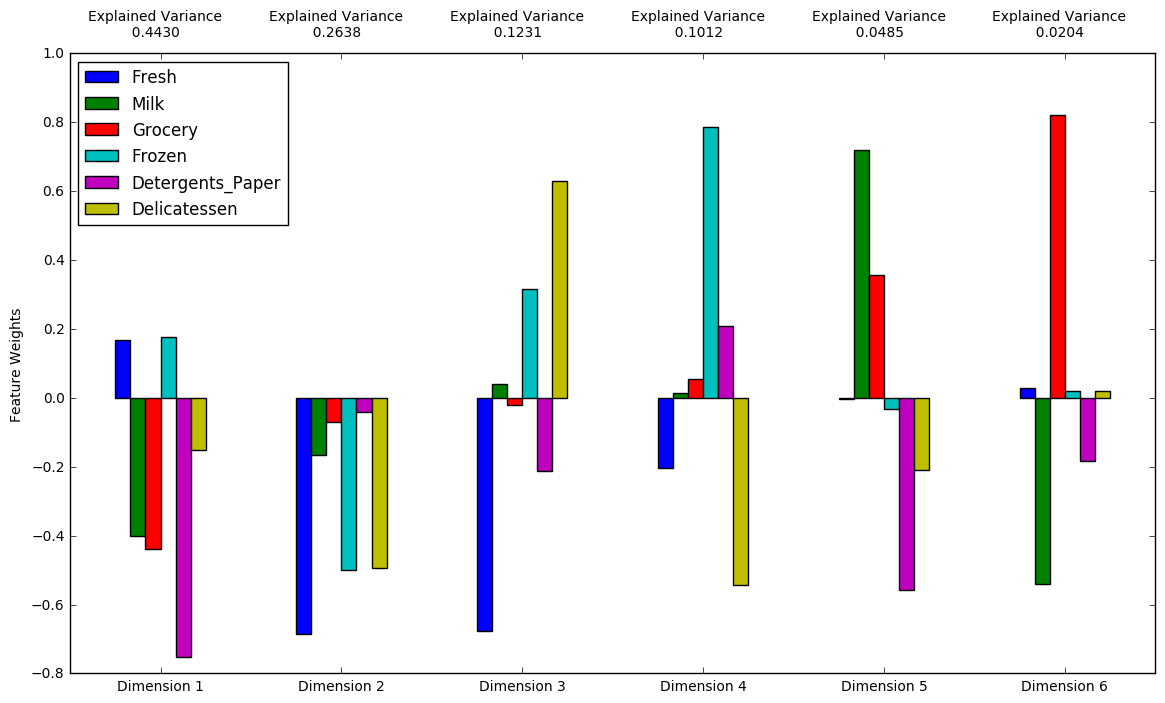

In [38]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

print("Cumulative sum of the explained variance = " + str(pca.explained_variance_ratio_.cumsum()))

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- The 1st component explains 49.72% of the variance and 2nd component explains 23.37% of the variance, totalling to 70.68%. 
- The first four principal components together explain 93.41% of the total variance
- The PCA components are direction-invariant (all weights can be flipped while giving the same solution). Hence we only need to look at the relative effect of each component. The first four dimensions represent the following: 
    1. The 1st dimension represents the correlated features "Milk", "Grocery" and "Detergents_Paper" (i.e. customers who spend on those 3 categories). Negative values for the dimension indicate high spenders in this category. 
    2. The 2nd dimension represents customers who spend equally on "Fresh", "Frozen" and "Delicatessen". Positive values indicate lower spenders. 
    3. The 3rd dimension represents customers that have opposite spending in "Fresh" and "Frozen"/"Delicatessen". Positive values indicate low spending on "Fresh" and high in "Frozen"/"Delicatessen". 
    4. 4th dimension primarily represents balance between "Frozen" and "Delicatessen". High values indicate low spending in "Delicatessen" and high spending in "Frozen". 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [39]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,0.3904,0.3379,0.9322,-1.0310,0.9615,-0.9282
2,1.2370,-0.3835,-1.8704,1.1242,0.8014,0.8437


The text between <> below is the unedited initial assessment. 

- 0) The numbers indicate high spending in all dimensions (dim1 is low negative and dim2 is positive) except "Frozen" (since dim3 is negative). This was similar to the initial assessment. 
    - < *(85) With high numbers across all categories (except Frozen) this establishment looks like a market or a retailer/reseller. * >


- 1) The positive dim1 indicates lower number for "Milk" which was 
    - < *(153) With high "Milk" (9250 vs average 5797) and upto average Delicatessen (1627 vs average 1525) this seems like a cafe.* >


- 2) Higher dim2 indicates high Fresh spending. Not clear why dim1 has a high +ve value (indicating low "Grocery" value). Possibly balanced by high dim6 (which correlates with high grocery spending). 
    - < *(311) With a high "Fresh" and "Grocery" this seems like a hotel/cafe. * > 

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [47]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [48]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,0.3904,0.3379
2,1.2370,-0.3835


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- KMeans
    - KMeans has a simple solution (Lloyd's algorithm) for solving the clustering problem. 
    - Easy interpretation of the cluster centers
    - Works reasonably well with Euclidean data with minimal outliers for spherical clusters
    - Fast and efficient in terms of computational cost
- GMM 
    - A Gaussian Mixture Modeling (GMM) is a parametric probability density function represented as a weighted sum of K component Gaussian densities. 
    - GMM allows performing a soft assignment for each point.
    - GMM is a lot more flexible in terms of cluster covariance. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans. As a result, cluster assignment is much more flexible in GMM than in k-means. (see image below from Quora)
![GMM](https://qph.ec.quoracdn.net/main-qimg-d7d5c9fb163cc5a64663492953a53c8a?convert_to_webp=true)

-----

Considering that we performed log scaling, outlier removal and PCA transformation, the clusters are fairly robust and spherical. This implies that most of the assumptions in KMeans will be satisfied - hence we choose to opt for the simpler modelling technique. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 12):
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, random_state=42)
    print("{0} Clusters, score = {1}".format(n_clusters, score))

2 Clusters, score = 0.426281015469
3 Clusters, score = 0.39689092645
4 Clusters, score = 0.331841276009
5 Clusters, score = 0.349997797526
6 Clusters, score = 0.365885220633
7 Clusters, score = 0.364801207979
8 Clusters, score = 0.367640756491
9 Clusters, score = 0.359879014605
10 Clusters, score = 0.364155280516
11 Clusters, score = 0.358452892209


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhouette scores for various cluster sizes: 

- 2 Clusters, score = 0.426281015469
- 3 Clusters, score = 0.39689092645
- 4 Clusters, score = 0.331841276009
- 5 Clusters, score = 0.349997797526
- 6 Clusters, score = 0.365885220633
- 7 Clusters, score = 0.364801207979
- 8 Clusters, score = 0.367640756491
- 9 Clusters, score = 0.359879014605
- 10 Clusters, score = 0.364155280516
- 11 Clusters, score = 0.358452892209

Judging by the scores, 2 clusters seem like the best fit for this data. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

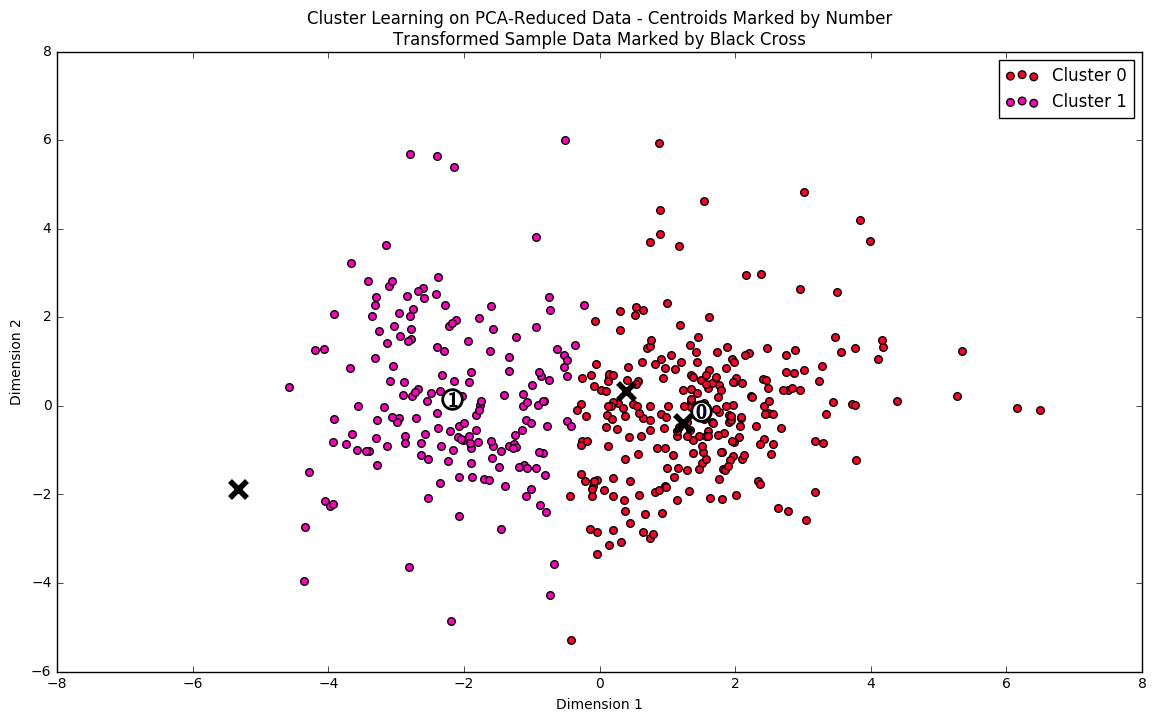

In [50]:
# Display the results of the clustering from implementation
clusterer = KMeans(n_clusters=2)
clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [69]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

print("Centers in log space")
log_centers = pd.DataFrame(log_centers, columns = data.keys())
log_centers.index = segments
display(log_centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(true_centers, columns = data.keys())
true_centers.index = segments
print("-------------------------------------")
print("Centers in original space")
display(true_centers)

Centers in log space


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9.090040,7.547822,7.814638,7.644075,5.683239,6.523988
Segment 1,8.295319,8.974607,9.401277,6.858928,8.425383,6.942672


-------------------------------------
Centers in original space


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8866.537526,1896.606799,2476.590865,2088.235650,293.899891,681.289638
Segment 1,4005.081505,7899.913069,12103.827422,952.345605,4561.392260,1035.533266


In [70]:
print("Log transformed data")
display(good_data.describe())
print("-------------------------------------")

print("Original data")
display(data.describe())


Log transformed data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


-------------------------------------
Original data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

- Cluster 0:
    - When comparing to mean of original values, cluster 0 has low values across all features.
        - Fresh (8866 vs mean of 12000)
        - Milk (1897 vs mean of 5796)
        - Grocery (2477 vs mean of 7951)
        - Frozen (2088 vs mean of 3071)
        - Detergents_Paper (294 vs mean of 2881)
        - Delicatessen (681 vs mean of 1524)
    - However, the Fresh value (8866) and Frozen (2088) are much closer to their means compared to others. This indicates this cluster could represent an establishment like a hotel or a cafe. 
- Cluster 1 has high values for Milk (7899 vs mean 5796), Grocery (12103 vs mean 7951), Detergents_Paper (4561 vs mean 2881), possibly representing markets and retailers. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [76]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
85,16117,46197,92780,1026,40827,2944
153,3463,9250,2368,779,302,1627
311,29635,2335,8280,3046,371,117


In [75]:
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8866.537526,1896.606799,2476.590865,2088.235650,293.899891,681.289638
Segment 1,4005.081505,7899.913069,12103.827422,952.345605,4561.392260,1035.533266


**Answer:**

- Sample point 0 (85): Estimated to be retailer (Segment 1)
    - The above numbers for 85 indicates high values for Fresh (16117) and Detergents (40827) which are the important values for dim1 and dim2 respectively. It's not clear which would play a more important role since the Fresh number indicates Segment0 but Detergents indicates Segment1. The high value for Grocery (92780) could mean it classifies to Segment1 (which has corresponding high value for Grocery - 12103). 

- Sample point 1 (153): Estimated to be hotel/cafe (Segment 0)
    - The low "Grocery" (3463), low "Detergents" (302), and low "Milk" matches well with Segment0 (2476, 293, 1896 respectively). 

- Sample point 3 (311): Estimated to be hotel/cafe (Segment 0)
    - High "Fresh" (29635) and high Frozen (3046) should easily put this in Segment 0 (corresponding values are 8866 and 2088). 

In [77]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Segment", pred

Sample point 0 predicted to be in Segment 1
Sample point 1 predicted to be in Segment 0
Sample point 2 predicted to be in Segment 0


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The best way to check how the change in delivery affects the customers is by picking representive customers from each cluster and testing the change with them. When a particular group of customers in the same cluster react positively, we can extend the change to more customers in that cluster. Identifying clusters that react postively will ease identification of more customers to extend that change. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

1. One way to identify new customers is to compute the distance between the new customers and the cluster centers. This computation will have to be done in the log scale using PCA features. The closest cluster center will provide the classification for each new customer. 
2. We could also build a supervised learner where the features can be from the original dataset and the response (target) variable is the obtained from the output of the clustering (customer segment). That would allow prediction of the new customer in the original feature space. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

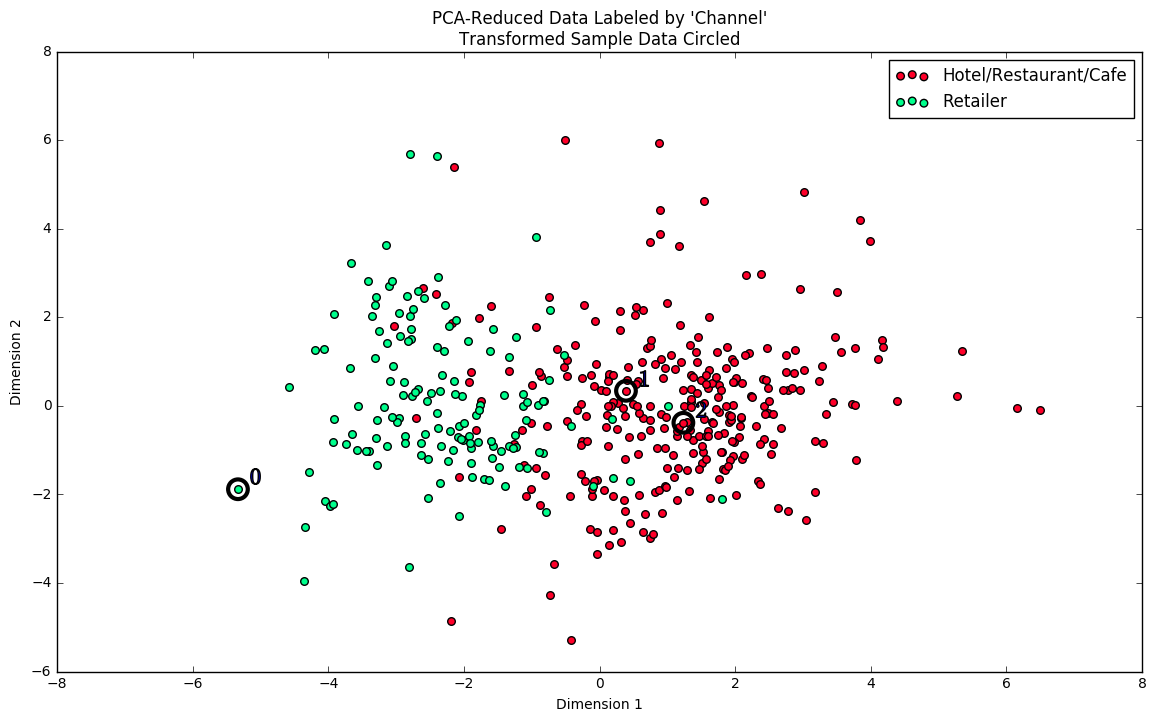

In [78]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The two clusters obtained looking at the silhouette score turned out to be the right setup for this problem. The actual data has more overlap between the clusters than predicted by KMeans. 

We also observe that the classification fo the samples are consistent with the original estimates. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.